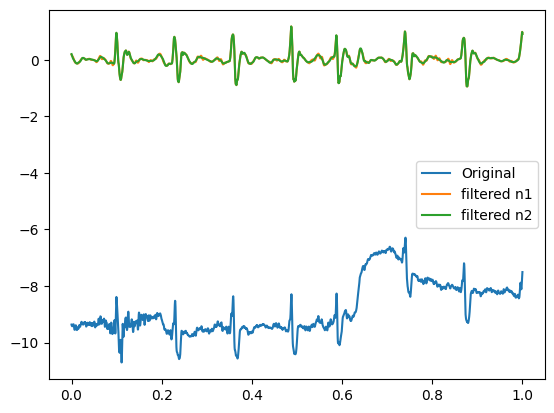

In [113]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import filtfilt, butter, iirnotch, lfilter
from statistics import median, mean

# Load ECG signal
ecg_signal_list = np.loadtxt('118e00.csv')
ecg_signal = np.array(ecg_signal_list)
#ecg_signal = ecg_signal-mean(ecg_signal)

def filter_signal(signal, n):
    # Define wavelet and level of decomposition
    wavelet = 'db4'
    level = 6

    # Perform wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    new_coeffs = []
    for id, coef in enumerate(coeffs):
        if id==1 or id==2 or id==3:
            '''
            mean_arr = np.convolve(abs(coef), np.ones(n) / n, mode='same')
            new_coeff = np.zeros(len(coef))
            for id, element in enumerate(coef):
                if abs(coef[id])>mean_arr[id]:
                    new_coeff[id] = coef[id]
            new_coeffs.append(new_coeff)
            '''
            new_coeffs.append(coef)
        else: 
            new_coeffs.append(np.zeros(len(coef)))

    ecg_filtered = pywt.waverec(new_coeffs, wavelet)
    return ecg_filtered

def filter_signal2(signal, n):
    # Define wavelet and level of decomposition
    wavelet = 'db4'
    level = 4

    # Perform wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    new_coeffs = []
    for id, coef in enumerate(coeffs):
        if id==0:
            '''
            mean_arr = np.convolve(abs(coef), np.ones(n) / n, mode='same')
            new_coeff = np.zeros(len(coef))
            for id, element in enumerate(coef):
                if abs(coef[id])>mean_arr[id]:
                    new_coeff[id] = coef[id]
            new_coeffs.append(new_coeff)
            '''
            new_coeffs.append(coef)
        elif id==1:
            mean_arr = np.convolve(abs(coef), np.ones(n) / n, mode='same')
            new_coeff = np.zeros(len(coef))
            for id, element in enumerate(coef):
                if abs(coef[id])>mean_arr[id]:
                    new_coeff[id] = coef[id]
            new_coeffs.append(new_coeff)
        else: 
            new_coeffs.append(np.zeros(len(coef)))

    # Perform wavelet thresholding

    # Reconstruct filtered signal
    ecg_filtered = pywt.waverec(new_coeffs, wavelet)
    return ecg_filtered
    # Plot original and filtered signals

import matplotlib.pyplot as plt
nums = [5, 10, 25, 60]

t = np.linspace(0, 1, 2000)
plt.plot(t,ecg_signal[3000:5000], label='Original')
plt.plot(t, filter_signal(ecg_signal, 25)[3000:5000], label='filtered n1')
plt.plot(t, filter_signal2(filter_signal(ecg_signal, 25), 25)[3000:5000], label='filtered n2')

plt.legend()
plt.show()

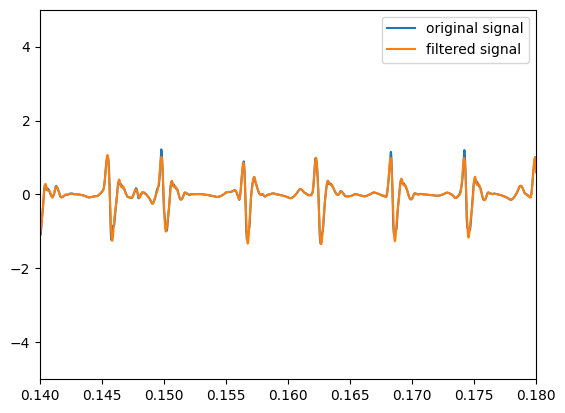

In [100]:
wavelet = 'db20'
level = 6

# Perform wavelet decomposition
sig = filter_signal(ecg_signal, 25)
coeffs = pywt.wavedec(sig, wavelet, level=level)

for i in range(1,len(coeffs)):
    t = np.linspace(0, 1, len(coeffs[i]))
    #plt.plot(t, coeffs[i],label=str(i))
    #print(len(coeffs[i]))

plt.plot(np.linspace(0, 1, len(sig)), sig, label='original signal')



new_coeffs = []
for id, coef in enumerate(coeffs):
    if id==0 or id==1 or id==2 or id==3:
        new_coeffs.append(coef)
    else: 
        new_coeffs.append(np.zeros(len(coef)))

ecg_filtered2 = pywt.waverec(new_coeffs, wavelet)

plt.plot(np.linspace(0, 1, len(ecg_filtered2)), ecg_filtered2, label='filtered signal')

plt.xlim(0.14, 0.18)
plt.ylim(-5,5)
plt.legend()



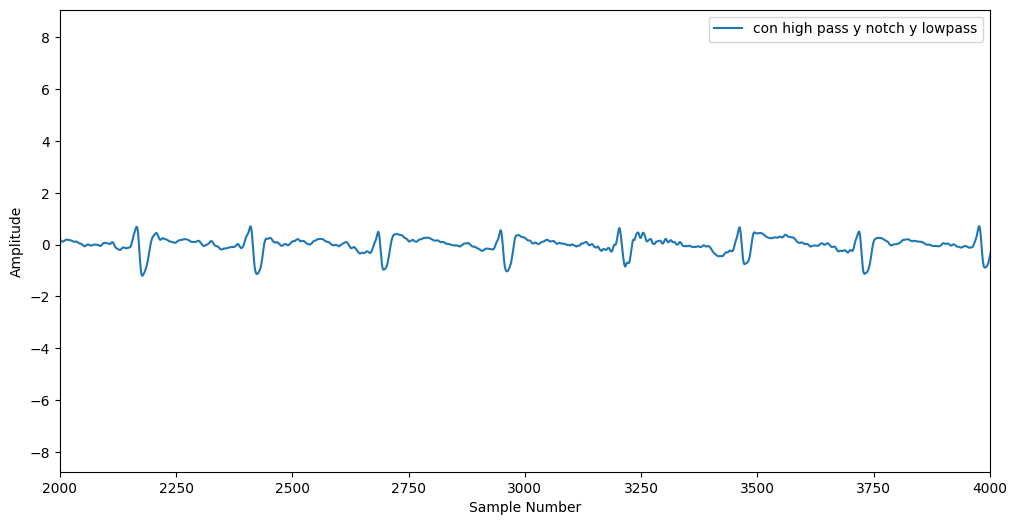

In [57]:
ecg = np.loadtxt('118e00.csv')

def apply_high_pass_filter(signal, cutoff_freq, sampling_freq):
    nyquist_freq = 0.5 * sampling_freq
    normalized_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(4, normalized_cutoff, btype='high', analog=False, output='ba')
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

def apply_notch_filter(signal, notch_freq, sampling_freq, Q=30.0):
    nyquist_freq = 0.5 * sampling_freq
    normalized_notch = notch_freq / nyquist_freq
    b, a = iirnotch(normalized_notch, Q)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

def apply_custom_filter(signal):
    a = [1,-1]
    b = [1/8, 0, 0, 0, 0, 0, 0, 0, -1/8]
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal


# Preprocesar segun paper de 11 pags
fs = 360

plt.figure(figsize=(12, 6))
#plt.plot(ecg, label='ECG')
besaline_wander_filtered_signal = apply_high_pass_filter(ecg, 0.8, fs)
#plt.plot(besaline_wander_filtered_signal, label='con high pass')
powerline_filtered_signal = apply_notch_filter(besaline_wander_filtered_signal, 50, fs)
#plt.plot(powerline_filtered_signal, label='con high pass y notch')
emg_filtered_signal = apply_custom_filter(powerline_filtered_signal)
#plt.plot(emg_filtered_signal, label='con high pass y notch y lowpass')
plt.plot(emg_filtered_signal, label='con high pass y notch y lowpass')

plt.xlim(2000,4000)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

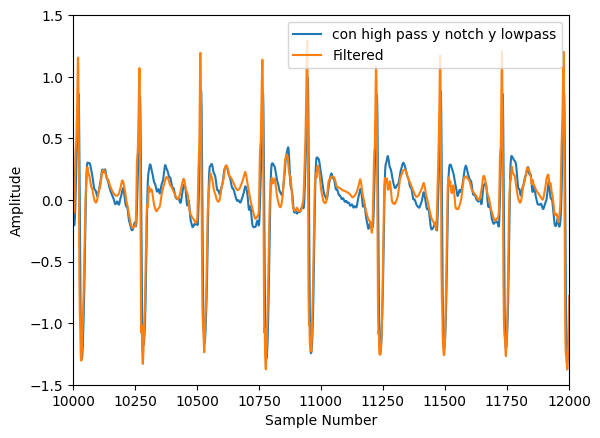

In [61]:
plt.plot(emg_filtered_signal, label='con high pass y notch y lowpass')

plt.plot(apply_high_pass_filter(ecg_filtered, 0.5, 360), label='Filtered')
plt.xlim(10000, 12000)
plt.ylim(-1.5,1.5)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.show()